In [1]:
%matplotlib inline
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 3

In [2]:
A = [
    [-.5,  0,  0,  0,  1 ],
    [ 0, -.5,  1,  0,  0 ],
    [ 0,  0, -.2,  1,  0 ],
    [ 0,  0,  0, -.9,  0 ],
    [ 0,  0,  0,  0, -.9 ]
]
A = np.array(A)
B = [[0, 0, 0, 1, 1],[0,0,0,0,0]]
B = np.array(B).transpose()
C = [[1,0,0,0,0],[0,1,0,0,0]]
C = np.array(C)

print(A)
print(B)
print(C)

Pbool = np.array([[1,0],[1,0]])

[[-0.5  0.   0.   0.   1. ]
 [ 0.  -0.5  1.   0.   0. ]
 [ 0.   0.  -0.2  1.   0. ]
 [ 0.   0.   0.  -0.9  0. ]
 [ 0.   0.   0.   0.  -0.9]]
[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]]
[[1 0 0 0 0]
 [0 1 0 0 0]]


(100, 2)


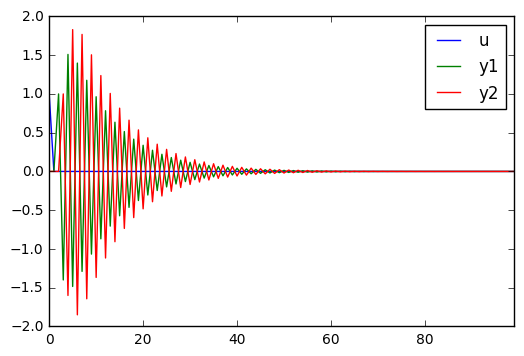

In [3]:
# Step input
n = 100
tstep = 1

def step(i, tstep):
    if i < tstep:
        return 1
    else:
        return 0

u = [step(i, tstep) for i in range(n)]
u2 = [0 for i in range(n)]
u = np.array([u, u2]).transpose()
print(u.shape)
y = ss_sim(A, B, C, u)

data = {
    'u': list(u[:,0]),
    'y1': list(y[:,0]),
    'y2': list(y[:,1])
}
data = pd.DataFrame(data)
data.plot()

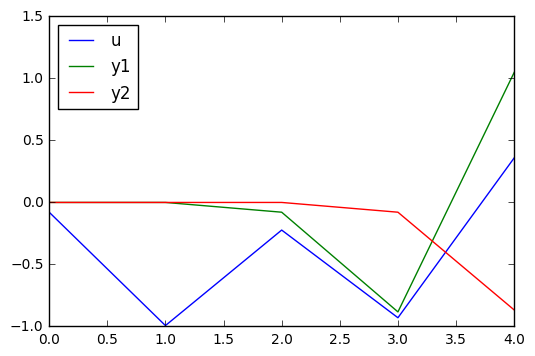

In [4]:
# Random
# u = np.random.rand(R * 6 + 1, 2) * 2 - 1
u = np.random.rand(5,2) * 2 - 1
y = ss_sim(A, B, C, u)

data = {
    'u': list(u[:,0]),
    'y1': list(y[:,0]),
    'y2': list(y[:,1])
}
data = pd.DataFrame(data)
data.plot()

In [5]:
recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, order=4, robust=False)
recon.measured(y, u, plot=True)  #, ij=(1,3))

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.000 Seconds
Building LP ...
	Done. Took 0.000 Seconds
Building M ...
	Done. Took 0.001 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 0.000
	Done. Took 0.002 Seconds
Extracting Qis ...
	Done. Took 0.000 Seconds
Extracting Pis ...
	Done. Took 0.000 Seconds
[[ 1.51]
 [ 0.82]
 [ 0.  ]
 [-0.45]
 [ 0.  ]
 [ 0.  ]
 [-0.  ]
 [-0.  ]
 [ 1.  ]
 [-0.  ]
 [-1.4 ]
 [ 0.18]]
----
{0: {1: [0, 1.5099999999962135, 0.0, 0.0]}, 1: {0: [0, 0.81818181816505242, -0.4545454545481844, 0.0]}}
----
{0: {0: [0, -5.8513540150337273e-13, 0.99999999999973099, -1.4000000000000641]}, 1: {0: [0, -2.8309088119472456e-11, -1.119227627244257e-11, 0.18181818179757669]}}

Reconstruction Complete! Took 0.003 Seconds



NameError: name 'params' is not defined

In [ ]:
print(u.shape)
print(y.shape)

In [ ]:
print(recon.T22)